**Instalar**

```Python
!pip install kmodes
!pip install prince
!pip install pca
```

### Fuentes y recursos

- https://www.analyticsvidhya.com/blog/2020/03/one-hot-encoding-vs-label-encoding-using-scikit-learn/
- https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/
- https://machinelearningmastery.com/discretization-transforms-for-machine-learning/

In [ ]:
!pip install pca
!pip install kmodes
!pip install prince

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv("https://raw.githubusercontent.com/marsgr6/EN-online/8a1cee296279c274d8f05f3905fce97c1f7636a2/data/UX_data.csv")

data

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,M,twenty,high,average,high
1,92.5,153.3,student,M,twenty,high,high,high
2,95.0,135.7,student,M,twenty,average,average,high
3,92.5,148.3,student,F,twenty,average,high,high
4,80.0,148.0,student,M,twenty,average,average,high
5,87.5,138.7,student,M,twenty,average,high,high
6,75.0,149.3,student,M,twenty,average,average,average
7,80.0,135.3,student,M,twenty,average,high,high
8,80.0,148.0,student,M,twenty,average,high,average
9,65.0,174.7,employee,F,forty,average,high,none


In [ ]:
encoded_data = data.copy()

In [ ]:
gender_response = {v: i for i,v in enumerate(data.Gender.unique())}
gender_response

{'M': 0, 'F': 1}

In [ ]:
col_r = ['Gender'] # column to replace values
[encoded_data.replace({col: gender_response}, inplace=True) for col in col_r];
encoded_data

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,0,twenty,high,average,high
1,92.5,153.3,student,0,twenty,high,high,high
2,95.0,135.7,student,0,twenty,average,average,high
3,92.5,148.3,student,1,twenty,average,high,high
4,80.0,148.0,student,0,twenty,average,average,high
5,87.5,138.7,student,0,twenty,average,high,high
6,75.0,149.3,student,0,twenty,average,average,average
7,80.0,135.3,student,0,twenty,average,high,high
8,80.0,148.0,student,0,twenty,average,high,average
9,65.0,174.7,employee,1,forty,average,high,none


In [ ]:
age_response = {v: 10+10*(i+1) for i,v in enumerate(data.Age.unique())}
print(age_response)

col_r = ['Age']  # column to replace values

[encoded_data.replace({col: age_response}, inplace=True) for col in col_r];
encoded_data

{'twenty': 20, 'forty': 30, 'thirty': 40}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,student,0,20,high,average,high
1,92.5,153.3,student,0,20,high,high,high
2,95.0,135.7,student,0,20,average,average,high
3,92.5,148.3,student,1,20,average,high,high
4,80.0,148.0,student,0,20,average,average,high
5,87.5,138.7,student,0,20,average,high,high
6,75.0,149.3,student,0,20,average,average,average
7,80.0,135.3,student,0,20,average,high,high
8,80.0,148.0,student,0,20,average,high,average
9,65.0,174.7,employee,1,30,average,high,none


In [ ]:
kinect_response = {v: 2-i for i,v in enumerate(data.Kinect.unique())}
print(kinect_response)

col_r = ['Kinect', 'NUI', 'Games']  # column to replace values

[encoded_data.replace({col: kinect_response}, inplace=True) for col in col_r];

ID_response = {v: i for i,v in enumerate(data.ID.unique())}
print(ID_response)

col_r = ['ID']  # column to replace values

[encoded_data.replace({col: ID_response}, inplace=True) for col in col_r];

encoded_data

{'high': 2, 'average': 1, 'none': 0}
{'student': 0, 'employee': 1}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,42.5,179.3,0,0,20,2,1,2
1,92.5,153.3,0,0,20,2,2,2
2,95.0,135.7,0,0,20,1,1,2
3,92.5,148.3,0,1,20,1,2,2
4,80.0,148.0,0,0,20,1,1,2
5,87.5,138.7,0,0,20,1,2,2
6,75.0,149.3,0,0,20,1,1,1
7,80.0,135.3,0,0,20,1,2,2
8,80.0,148.0,0,0,20,1,2,1
9,65.0,174.7,1,1,30,1,2,0


Hemos realizado un ordinal encoding

- Obtendriámos el mismo resultado del `replace` usando el `OrdinalEncoder` implementado en `sklearn.preprocessing`

- Se muestra a continuación un ejemplo para la columna `Game`:

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[['none','average','high']])

print(encoder.fit_transform(np.array(data.Games).reshape(-1, 1)).flatten().astype('int'))

[2 2 2 2 2 2 1 2 1 0 1 1 2 1 0 1 1 1 1 0 2 1 1 1 0 1 0 1 0 1]


In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(encoded_data)

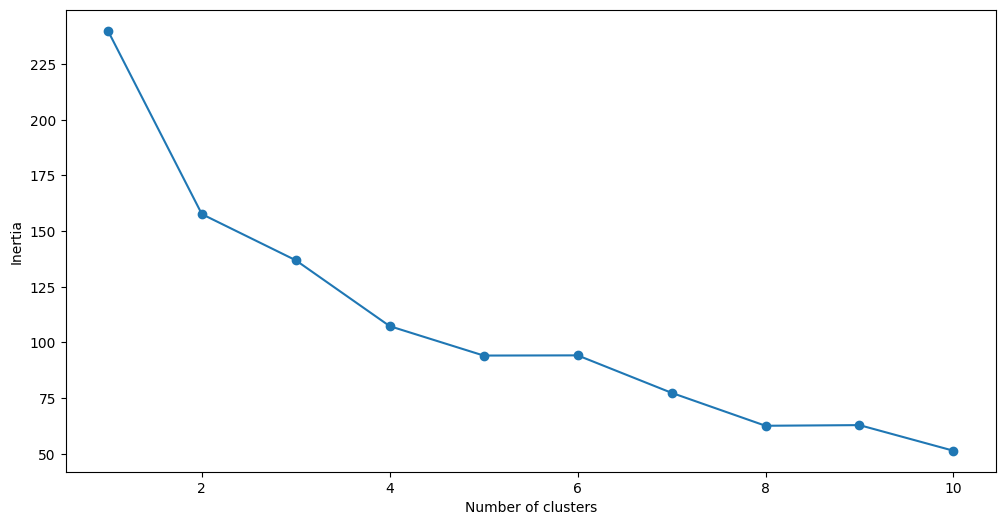

In [ ]:
from sklearn.cluster import KMeans

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
test_clusters = 10
for cluster in range(1,test_clusters+1):
    kmeans = KMeans(n_clusters=cluster, n_init="auto")
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(frame.Cluster[1::2]);

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2'])

kmeans = KMeans(n_clusters=2, n_init="auto").fit(data_scaled)

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

pc_transformation

,PC1,PC2,Cluster
0,-1.653543,2.163630,1
1,-2.664201,0.763526,1
2,-2.107784,-0.982539,1
3,-1.464268,0.735110,1
4,-1.807135,-0.259044,1
5,-2.275589,0.058094,1
6,-1.181957,-0.439659,1
7,-2.288185,0.244806,1
8,-1.498798,0.107116,1
9,1.784327,1.573885,0


<Axes: xlabel='PC1', ylabel='PC2'>

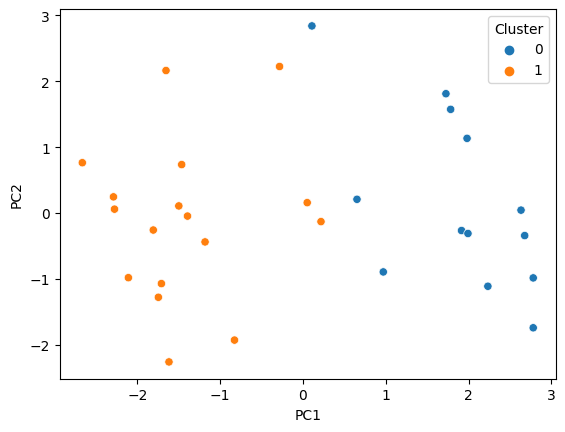

In [ ]:
import seaborn as sns

sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue="Cluster")

In [ ]:
pca.explained_variance_ratio_.sum()

0.6000606285731005

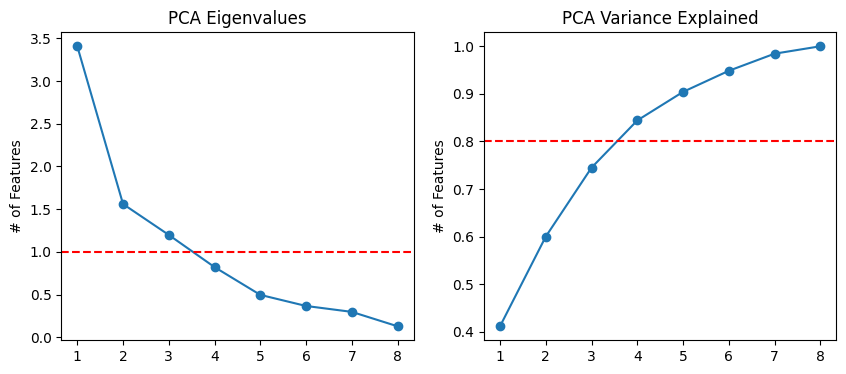

In [ ]:
pca = PCA(n_components=len(data.columns)).fit(data_scaled)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_, '-o')
plt.axhline(y=1, color='r', linestyle='--')
plt.ylabel("Eigenvalues")
plt.ylabel("# of Features")
plt.title("PCA Eigenvalues")

plt.subplot(1,2,2)
plt.plot(range(1,len(data.columns)+1), pca.explained_variance_ratio_.cumsum(), '-o')
plt.axhline(y=0.80, color='r', linestyle='--')
plt.ylabel("% Variance Explained")
plt.ylabel("# of Features")
plt.title("PCA Variance Explained");

In [ ]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(data_scaled)

pc_transformation = pd.DataFrame(data = principalComponents,
                           columns = ['PC1', 'PC2', 'PC3'])

pc_transformation['Cluster'] = pd.Categorical(kmeans.labels_)

pc_transformation

,PC1,PC2,PC3,Cluster
0,-1.653543,2.163630,2.008009,1
1,-2.664201,0.763526,-0.617872,1
2,-2.107784,-0.982539,-0.696465,1
3,-1.464268,0.735110,-2.173228,1
4,-1.807135,-0.259044,-0.115062,1
5,-2.275589,0.058094,-1.011387,1
6,-1.181957,-0.439659,0.205047,1
7,-2.288185,0.244806,-0.677408,1
8,-1.498798,0.107116,-0.621340,1
9,1.784327,1.573885,-0.410293,0


In [ ]:
import plotly.express as px

fig = px.scatter_3d(pc_transformation, x='PC1', y='PC2', z='PC3',
              color='Cluster')
fig.show()

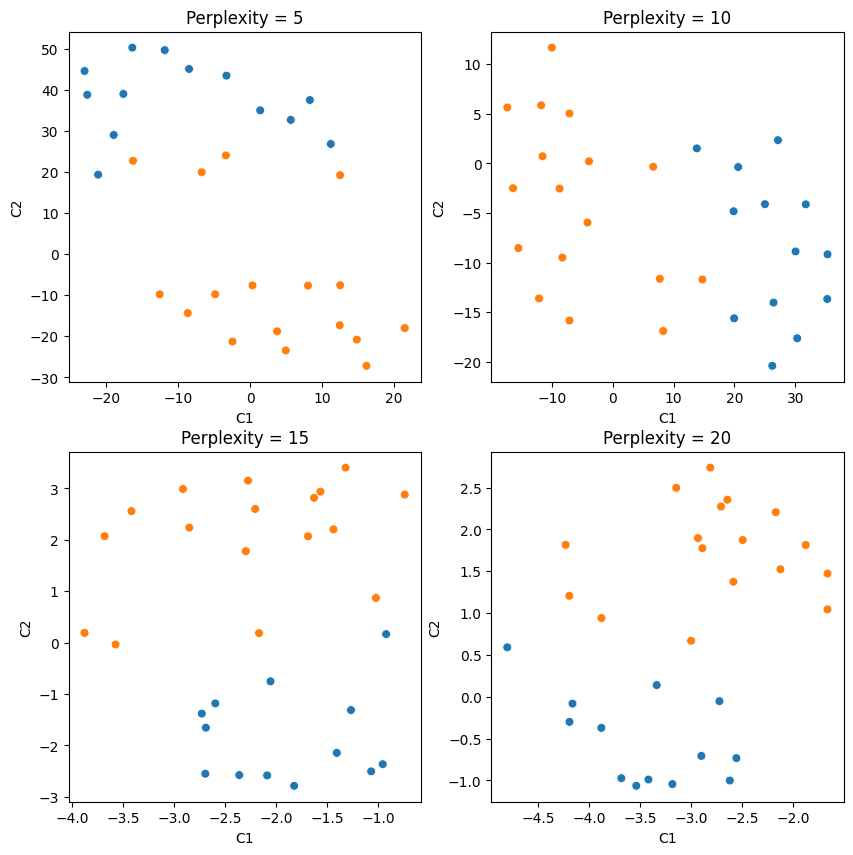

In [ ]:
from sklearn.manifold import TSNE

plt.figure(figsize=(10,10))
for index, p in enumerate([5, 10, 15, 20]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(data_scaled)

    tsne_results=pd.DataFrame(tsne_results, columns=['C1', 'C2'])

    tsne_results['Cluster'] = pd.Categorical(kmeans.labels_)

    plt.subplot(2,2,index+1)
    sns.scatterplot(data=tsne_results, x='C1', y='C2',
                    hue="Cluster", s=40)
    plt.title('Perplexity = '+ str(p))
    plt.legend([],[], frameon=False)
plt.show()

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
data_disc = data.copy()

data_disc[['SUS', 'Time']] = discretizer.fit_transform(data[data.columns[:2]]).astype('int')

bin_response = {i: v for i,v in enumerate(['low', 'medium', 'high'])}
print(bin_response)

col_r = ['SUS', 'Time']  # column to replace values

[data_disc.replace({col: bin_response}, inplace=True) for col in col_r];

data_disc

{0: 'low', 1: 'medium', 2: 'high'}


,SUS,Time,ID,Gender,Age,Kinect,NUI,Games
0,low,high,student,M,twenty,high,average,high
1,high,medium,student,M,twenty,high,high,high
2,high,low,student,M,twenty,average,average,high
3,high,medium,student,F,twenty,average,high,high
4,high,medium,student,M,twenty,average,average,high
5,high,medium,student,M,twenty,average,high,high
6,medium,medium,student,M,twenty,average,average,average
7,high,low,student,M,twenty,average,high,high
8,high,medium,student,M,twenty,average,high,average
9,medium,high,employee,F,forty,average,high,none


<Axes: xlabel='SUS', ylabel='Time'>

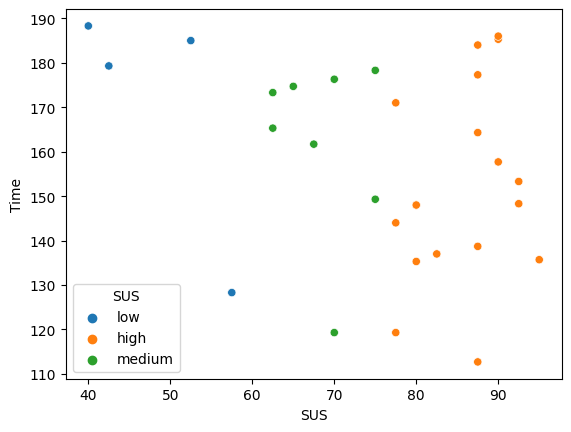

In [ ]:
sns.scatterplot(data=data, x="SUS", y="Time", hue=data_disc.SUS)

```
Parameters
    -----------
    n_clusters : int, optional, default: 8
        The number of clusters to form as well as the number of
        centroids to generate.
    max_iter : int, default: 300
        Maximum number of iterations of the k-modes algorithm for a
        single run.
    cat_dissim : func, default: matching_dissim
        Dissimilarity function used by the algorithm for categorical variables.
        Defaults to the matching dissimilarity function.
    init : {'Huang', 'Cao', 'random' or an ndarray}, default: 'Cao'
        Method for initialization:
        'Huang': Method in Huang [1997, 1998]
        'Cao': Method in Cao et al. [2009]
        'random': choose 'n_clusters' observations (rows) at random from
        data for the initial centroids.
        If an ndarray is passed, it should be of shape (n_clusters, n_features)
        and gives the initial centroids.
    n_init : int, default: 10
        Number of time the k-modes algorithm will be run with different
        centroid seeds. The final results will be the best output of
        n_init consecutive runs in terms of cost.
    verbose : int, optional
        Verbosity mode.
```

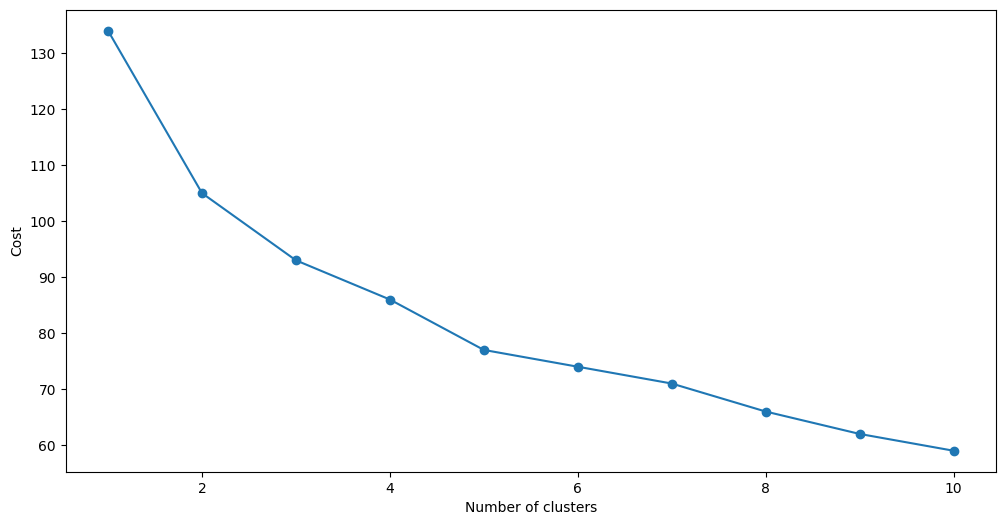

In [ ]:
from kmodes.kmodes import KModes

# Elbow curve to find optimal K
cost = []
test_clusters = 10

for num_clusters in range(1, test_clusters+1):
    kmodes = KModes(n_clusters=num_clusters, init = "random")
    kmodes.fit_predict(data)
    cost.append(kmodes.cost_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,test_clusters+1), 'Cost':cost})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['Cost'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.xticks(frame.Cluster[1::2]);
plt.show()

In [ ]:
kmodes = KModes(n_clusters=2, init = "random")
kmodes.fit_predict(data)

data_disc["Cluster"] = pd.Categorical(kmodes.labels_)

In [ ]:
data_disc

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games,Cluster
0,low,high,student,M,twenty,high,average,high,1
1,high,medium,student,M,twenty,high,high,high,1
2,high,low,student,M,twenty,average,average,high,1
3,high,medium,student,F,twenty,average,high,high,1
4,high,medium,student,M,twenty,average,average,high,1
5,high,medium,student,M,twenty,average,high,high,1
6,medium,medium,student,M,twenty,average,average,average,1
7,high,low,student,M,twenty,average,high,high,1
8,high,medium,student,M,twenty,average,high,average,1
9,medium,high,employee,F,forty,average,high,none,0


In [ ]:
import prince

mca = prince.MCA()

mca = mca.fit(data_disc[data_disc.columns[:-1]]) # same as calling ca.fs_r(1)
mca = mca.transform(data_disc[data_disc.columns[:-1]]) # same as calling ca.fs_r_sup(df_new) for *another* test set.

In [ ]:
mca_comp = pd.DataFrame(np.array(mca), columns=['PC1', 'PC2'])
mca_comp['Cluster'] = kmodes.labels_
mca_comp

,PC1,PC2,Cluster
0,-0.398898,-0.404242,1
1,-0.900264,-0.127371,1
2,-0.744825,0.249723,1
3,-0.707985,-0.193009,1
4,-0.751074,-0.110991,1
5,-0.907433,0.006947,1
6,-0.433426,-0.311069,1
7,-0.901184,0.367661,1
8,-0.717884,-0.142274,1
9,0.770942,0.244533,0


<Axes: xlabel='PC1', ylabel='PC2'>

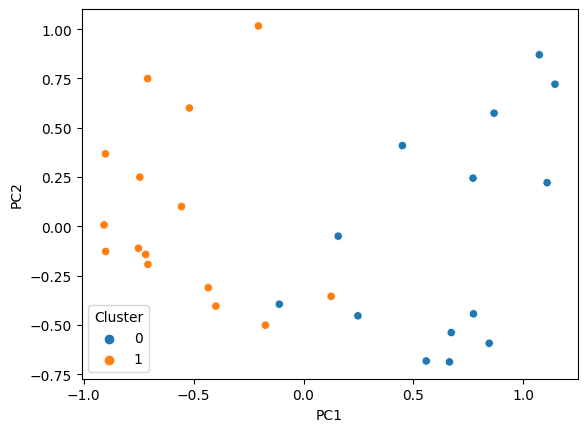

In [ ]:
sns.scatterplot(data=mca_comp, x='PC1', y="PC2", hue="Cluster")

<Axes: xlabel='PC1', ylabel='PC2'>

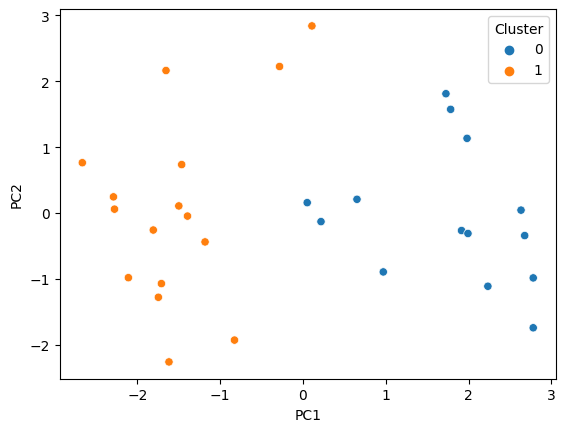

In [ ]:
sns.scatterplot(data=pc_transformation, x="PC1", y="PC2", hue=mca_comp.Cluster)

<Axes: xlabel='SUS', ylabel='Time'>

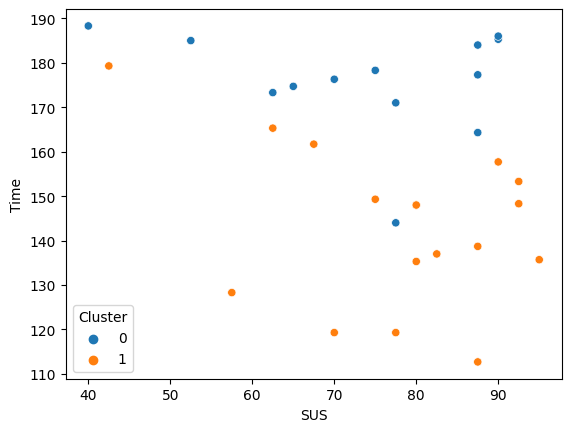

In [ ]:
sns.scatterplot(data=data, x="SUS", y="Time", hue=pc_transformation.Cluster)

<Axes: xlabel='SUS', ylabel='Time'>

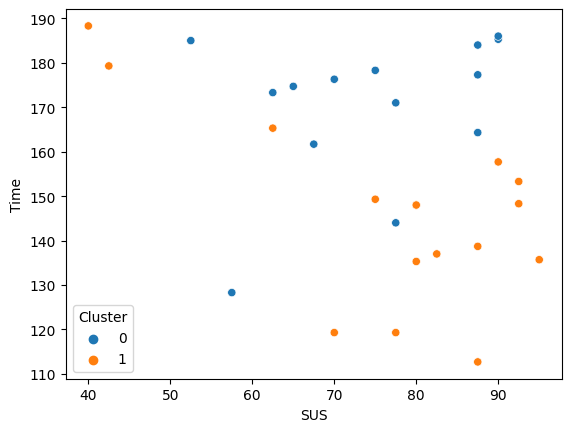

In [ ]:
sns.scatterplot(data=data, x="SUS", y="Time", hue=mca_comp.Cluster)

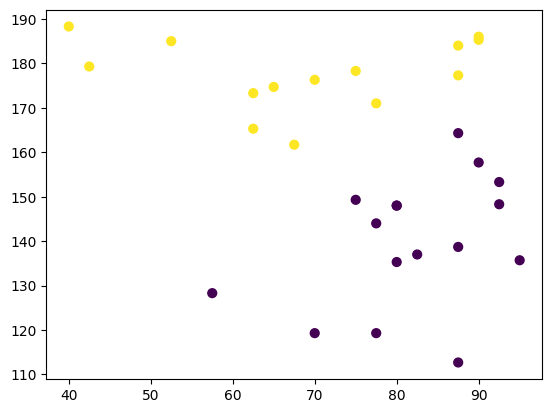

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
gmm_model = GMM(n_components=2,covariance_type='full')

X = np.array(encoded_data)[:,:2]
gmm_model.fit(X)
labels = gmm_model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')
plt.show()

In [ ]:
probs = np.round(gmm_model.predict_proba(X), 2)
probs

array([[0.  , 1.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.28, 0.72],
       [1.  , 0.  ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.03, 0.97],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.68, 0.32],
       [0.03, 0.97],
       [0.01, 0.99],
       [0.04, 0.96],
       [0.04, 0.96],
       [0.1 , 0.9 ],
       [1.  , 0.  ]])

<ipython-input-31-fa63a8ec4b94>:18: MatplotlibDeprecationWarning:

Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.



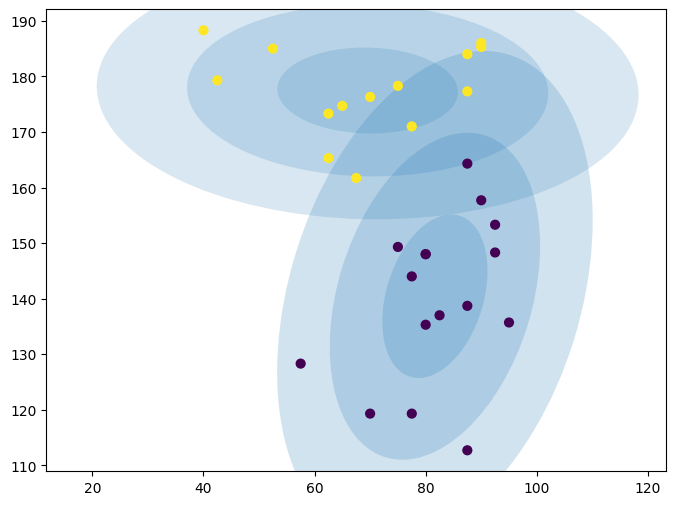

In [ ]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_[:2], gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

    plt.show()

gmm_model = GMM(n_components=2, random_state=42)
fig, ax = plt.subplots(figsize=(8, 6))
plot_gmm(gmm_model, X, ax=ax)

In [ ]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN()

dbscan.fit(X)

dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

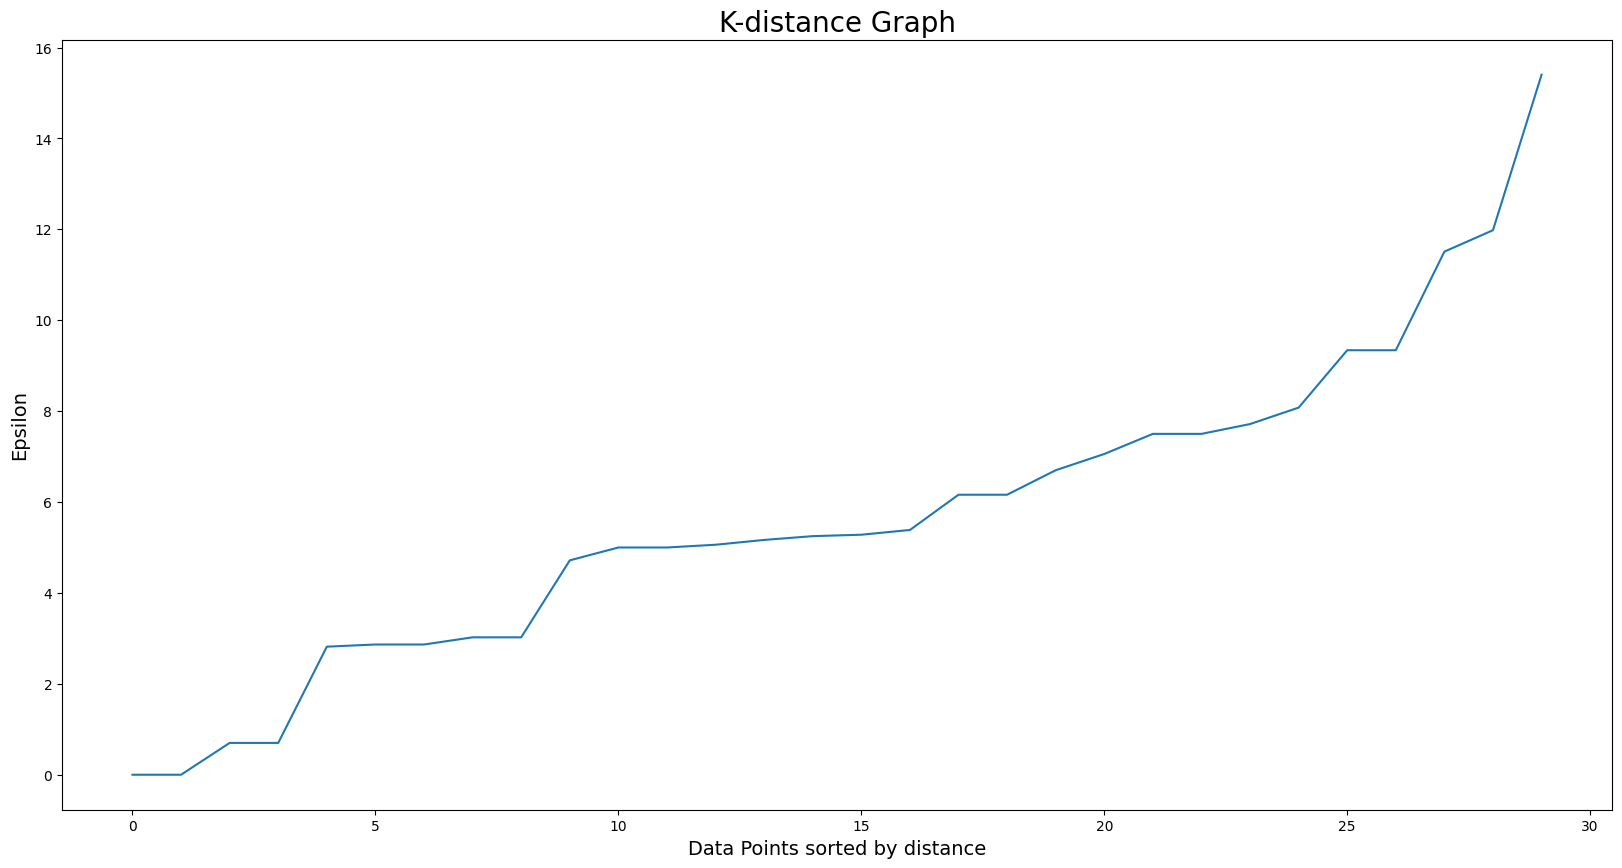

In [ ]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

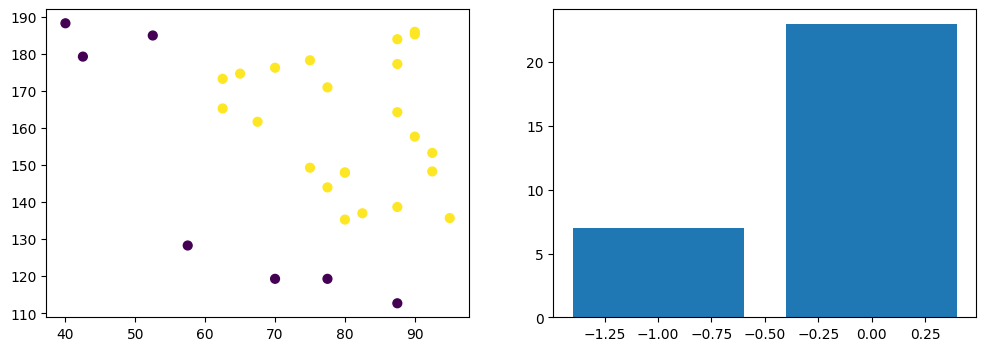

In [ ]:
dbscan_opt = DBSCAN(eps=15,min_samples=4)
dbscan_opt.fit(X)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_opt.labels_, s=40, cmap='viridis')
plt.subplot(1,2,2)
plt.bar(*np.unique(dbscan_opt.labels_, return_counts=True))
plt.show()

In [ ]:
X = np.array(encoded_data)  # model with all data
gmm_model.fit(X)
labels = gmm_model.predict(X)

data['Kmeans'] = kmeans.labels_.astype('str')
data['Kmodes'] = kmodes.labels_.astype('str')
data['gmm'] = labels.astype('str')
data['dbscan'] = dbscan_opt.labels_.astype('str')

all_data ={'data_clusters': data,
           'numerical': encoded_data,
           'categorical': data_disc
          }

data

,SUS,Time,ID,Gender,Age,Kinect,NUI,Games,Kmeans,Kmodes,gmm,dbscan
0,42.5,179.3,student,M,twenty,high,average,high,1,1,1,-1
1,92.5,153.3,student,M,twenty,high,high,high,1,1,0,0
2,95.0,135.7,student,M,twenty,average,average,high,1,1,0,0
3,92.5,148.3,student,F,twenty,average,high,high,1,1,0,0
4,80.0,148.0,student,M,twenty,average,average,high,1,1,0,0
5,87.5,138.7,student,M,twenty,average,high,high,1,1,0,0
6,75.0,149.3,student,M,twenty,average,average,average,1,1,0,0
7,80.0,135.3,student,M,twenty,average,high,high,1,1,0,0
8,80.0,148.0,student,M,twenty,average,high,average,1,1,0,0
9,65.0,174.7,employee,F,forty,average,high,none,0,0,1,0


In [ ]:
from viz import *

plot_data(all_data)

interactive(children=(Dropdown(description='ds', options=('data_clusters', 'numerical', 'categorical'), value=…

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = encoded_data[encoded_data.columns[:-1]]
y = kmeans.labels_

rf = RandomForestClassifier(n_estimators=100, random_state=123)
# cambiar valores de acuerdo al numero de columnas en el dataset
rf.fit(X, y)

RandomForestClassifier(random_state=123)

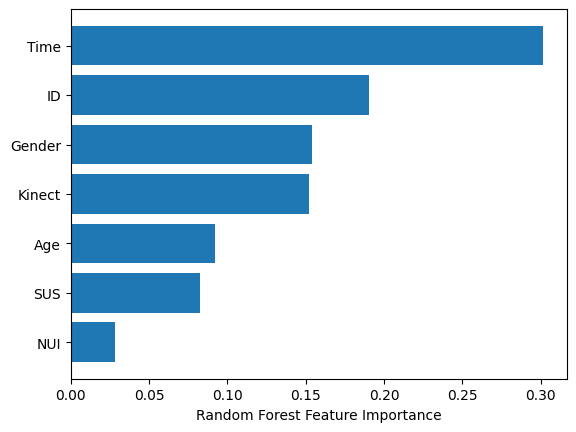

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx][:], rf.feature_importances_[sorted_idx][:])
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
pca.components_

array([[-0.08700811,  0.37570515,  0.48844377,  0.31952703,  0.42278271,
        -0.36275684, -0.19883136, -0.40090989],
       [-0.47718141,  0.40364357,  0.06016326,  0.31446557,  0.05178989,
         0.36063301,  0.55396327,  0.25932199],
       [-0.61043737, -0.09979971,  0.13644123, -0.42707245,  0.17791356,
         0.40136314, -0.4661844 , -0.07953397]])

[pca] >Extracting column labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


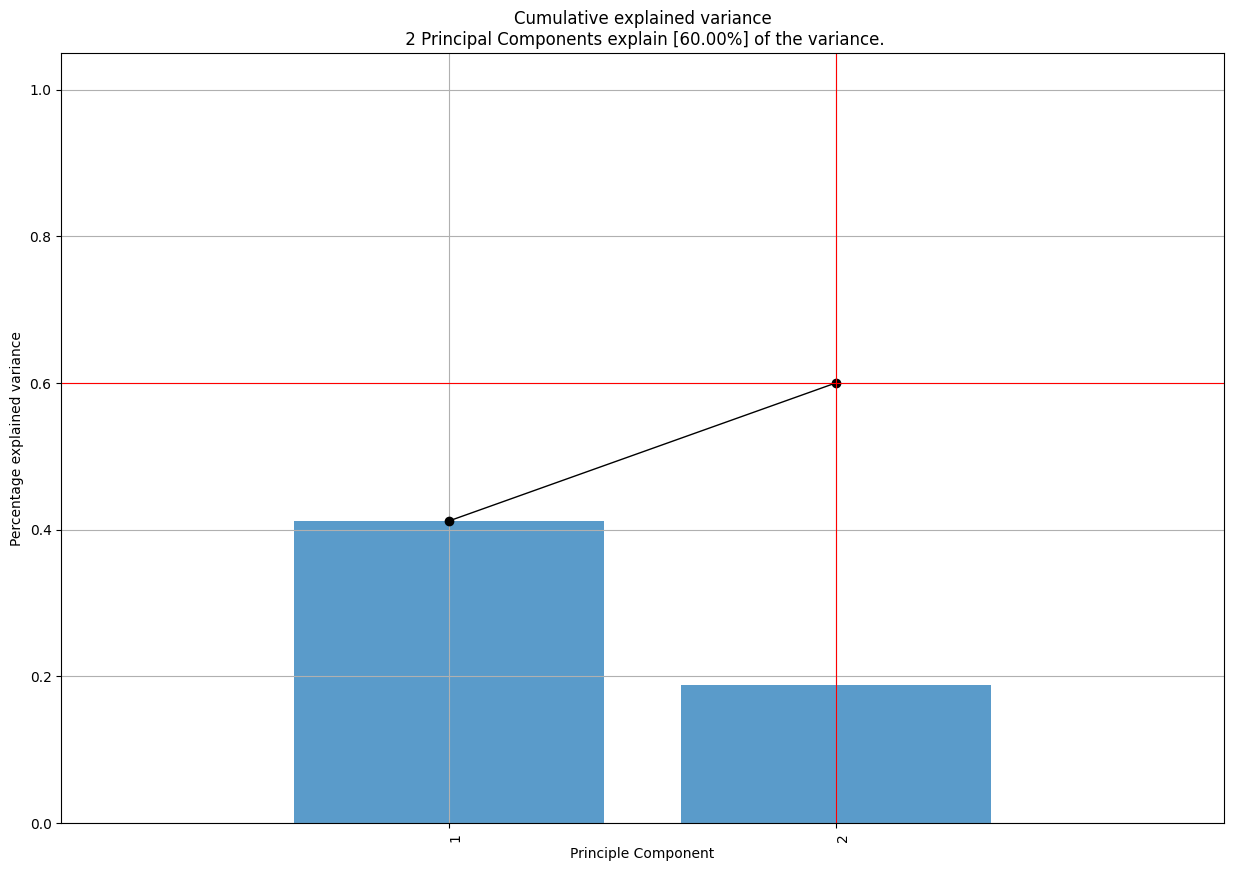

[scatterd] >INFO> Create scatterplot


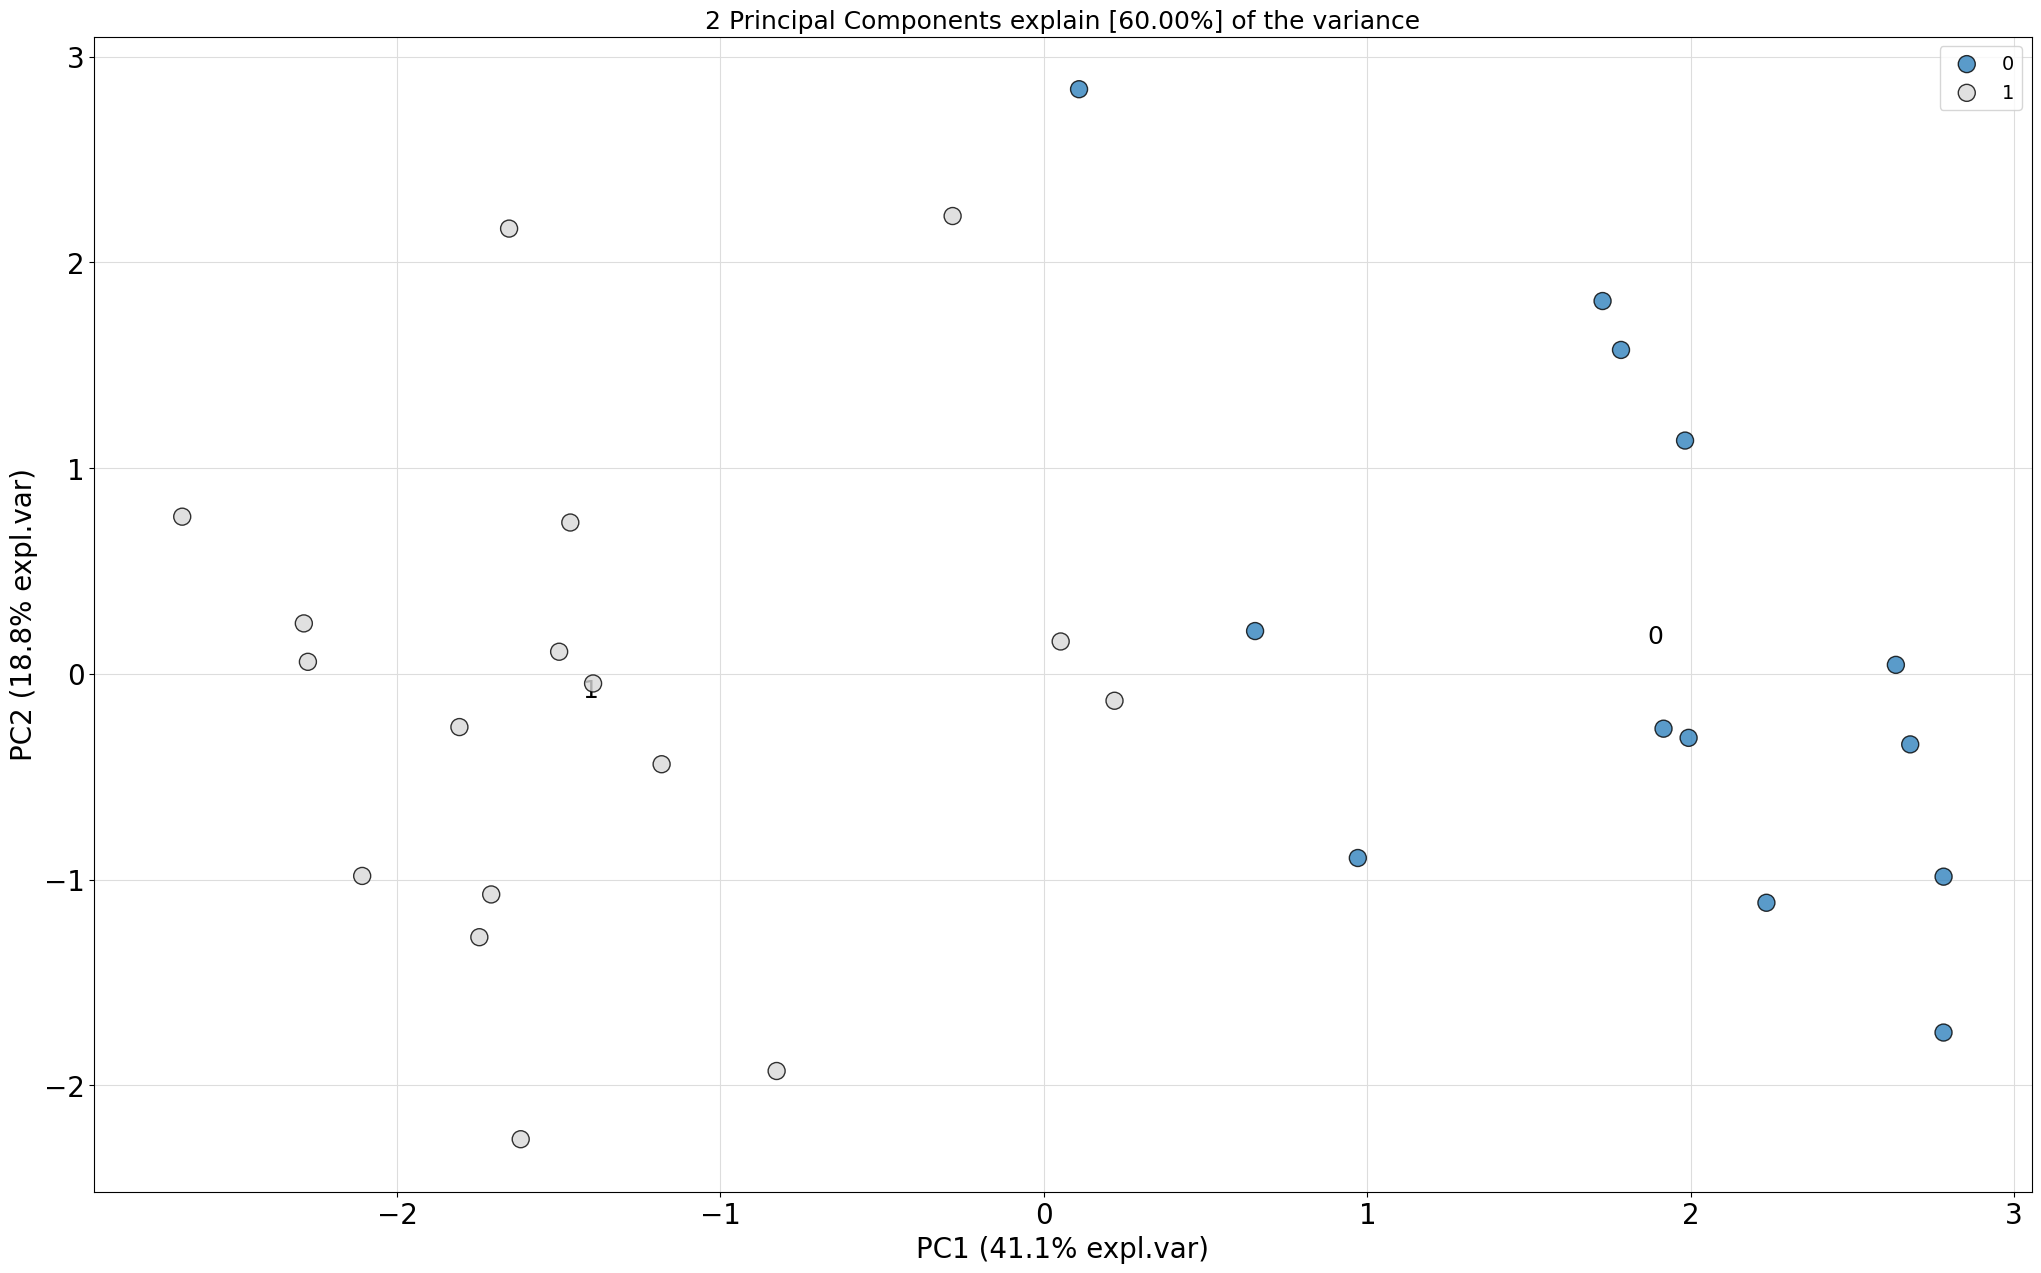

In [ ]:
from pca import pca

model = pca(n_components=2)

# Fit and transform
results = model.fit_transform(X=pd.DataFrame(data_scaled, columns=data.columns[:-4]), row_labels=data.Kmeans)

# Plot the explained variance
fig, ax = model.plot()
plt.show()
# Scatter the first two PCs
fig, ax = model.scatter()
plt.show()

[scatterd] >INFO> Create scatterplot


[pca] >Plot PC1 vs PC2 with loadings.


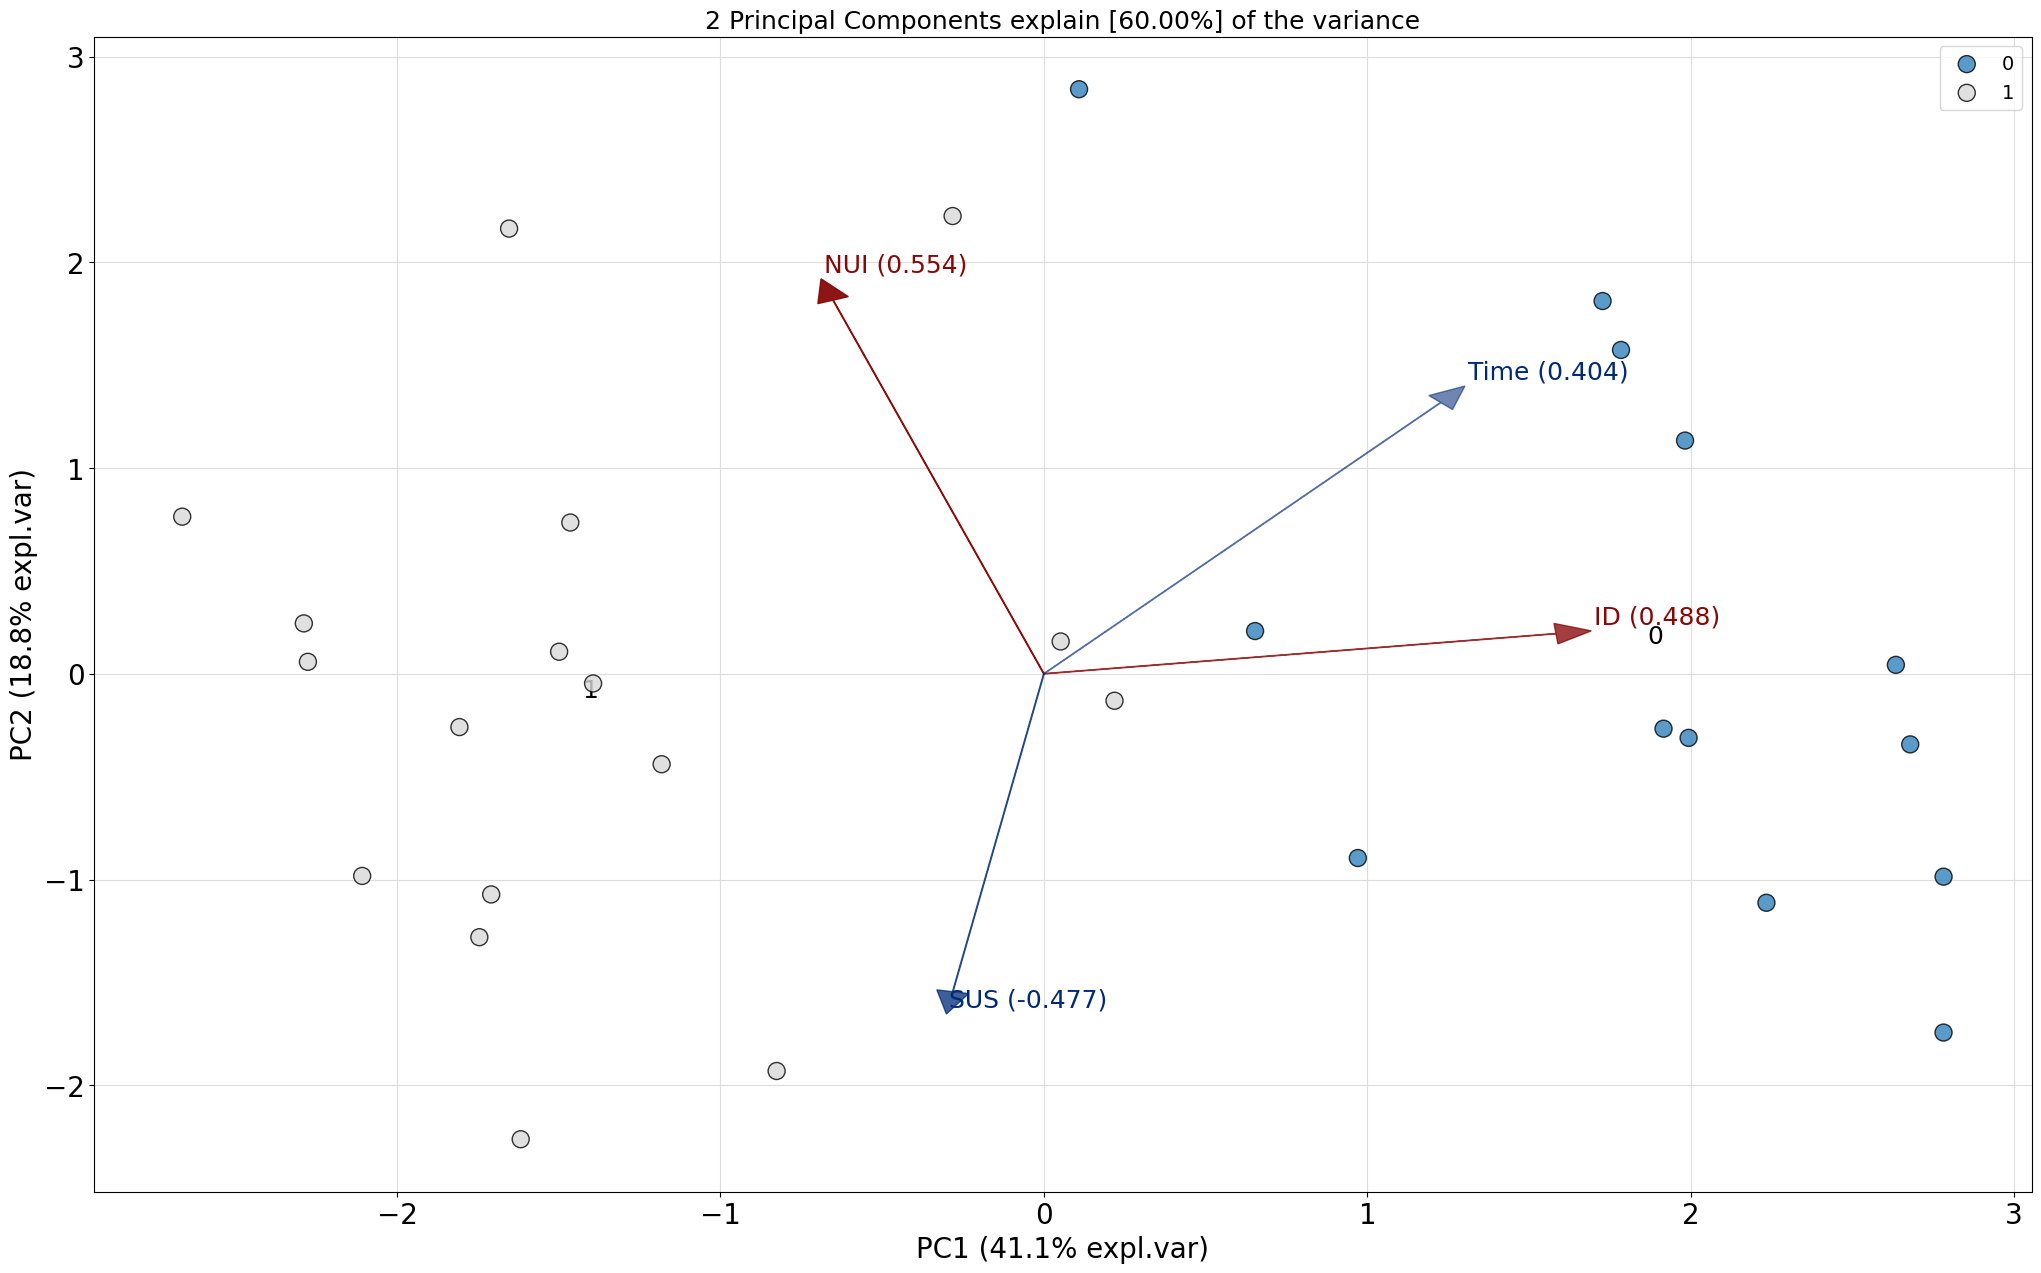

In [ ]:
# Create a biplot
fig, ax = model.biplot(n_feat=4)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = sns.load_dataset("geyser")
scaler = StandardScaler()
scaler.fit(data[['duration', 'waiting']])
scaled_data = scaler.transform(data[['duration', 'waiting']])

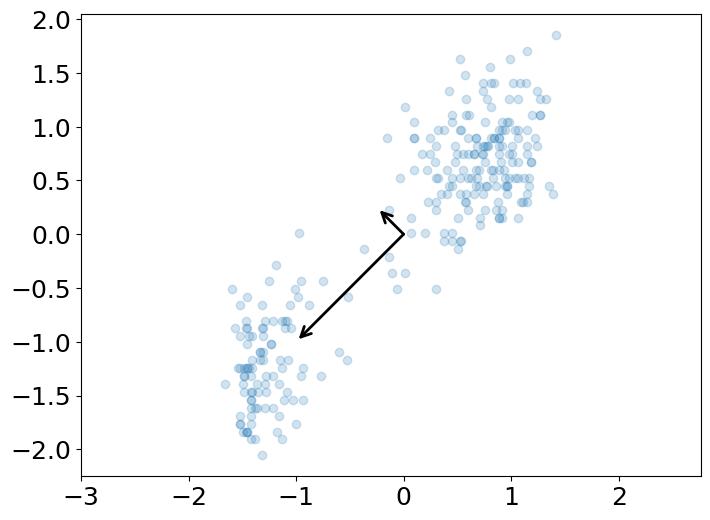

array([0.95040558, 0.04959442])

In [ ]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data

X = scaled_data

pca = PCA(n_components=2)
pca.fit(X)

plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.show()
pca.explained_variance_ratio_

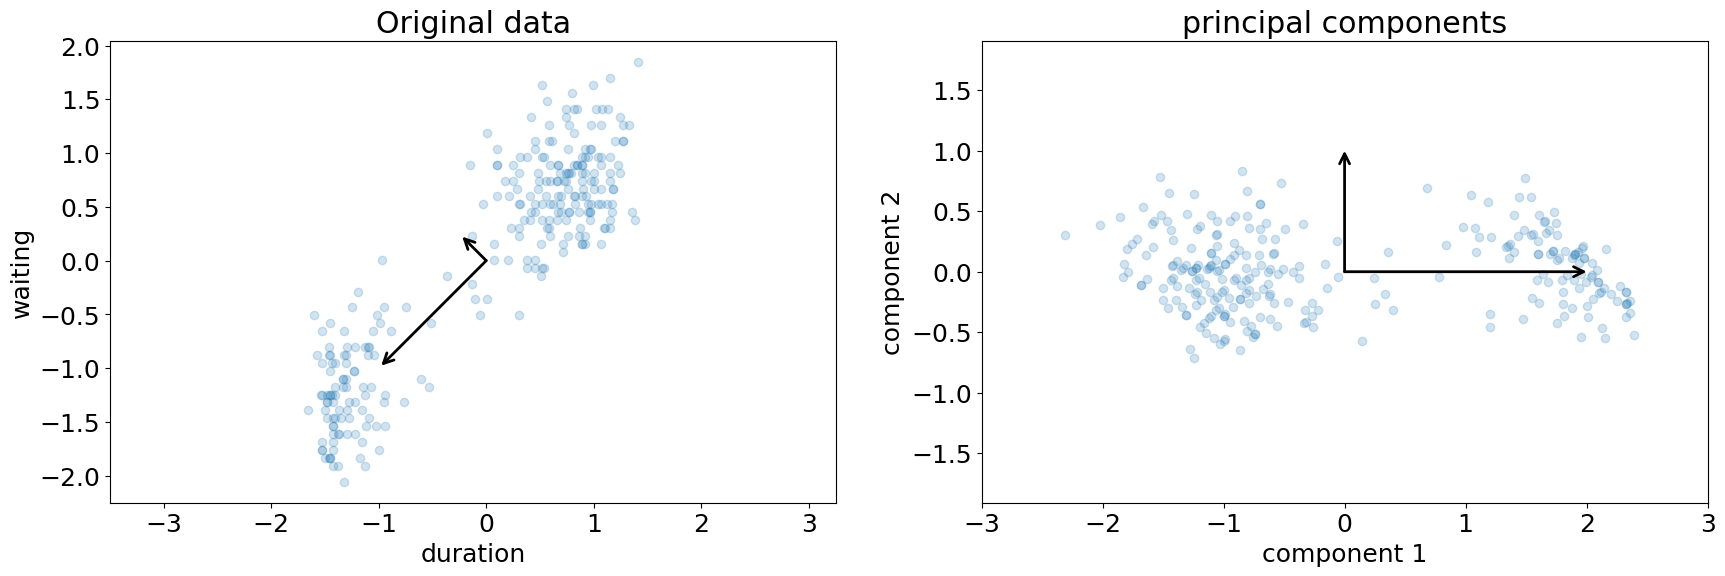

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.2)

# plot data
ax[0].scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 1 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v, ax=ax[0])
ax[0].axis('equal');
ax[0].set(xlabel='duration', ylabel='waiting', title='Original data')

# plot principal components
X_pca = pca.transform(X)
ax[1].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 1], ax=ax[1])
draw_vector([0, 0], [2, 0], ax=ax[1])
ax[1].axis('equal')
ax[1].set(xlabel='component 1', ylabel='component 2',
          title='principal components',
          xlim=(-3, 3), ylim=(-1, 1))
plt.show()

### Sources and resources

- https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/
https://jakevdp.github.io/PythonDataScienceHandbook/index.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html